In [1]:
"""
!pip install --quiet duckdb
!pip install --quiet jupysql 
!pip install --quiet duckdb-engine
!pip install --quiet pandas
!pip install --quiet matplotlib
"""

'\n!pip install --quiet duckdb\n!pip install --quiet jupysql \n!pip install --quiet duckdb-engine\n!pip install --quiet pandas\n!pip install --quiet matplotlib\n'

In [2]:
#!pip install nbformat

In [3]:
import duckdb
import sqlite3
import pandas as pd
import re
import requests
import matplotlib.pyplot as plt
import sys
import re

import numpy as np
import pandas as pd

import plotly.express as px
import cufflinks as cf
cf.go_offline()

import statistics

import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
pd.set_option('mode.chained_assignment',None)

In [6]:
#Import with duckdb the diamonds_train tables
conn = sqlite3.connect("../data/diamonds_train.db")

In [7]:
diamonds_city = pd.read_sql_query("SELECT * FROM diamonds_city", conn)
diamonds_city

,city_id,city
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam
1,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich
2,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas
3,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,New York City
4,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,Paris
5,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,Tel Aviv
6,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai
7,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly
8,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat
9,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp


In [8]:
diamonds_clarity = pd.read_sql_query("SELECT * FROM diamonds_clarity", conn)
diamonds_clarity

,clarity_id,clarity
0,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2
1,3f9db06236e9719b61c826b612b882fa702ec81574e44c...,VVS2
2,66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d8...,VVS1
3,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,IF
4,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1
5,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1
6,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1
7,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2


In [9]:
diamonds_color = pd.read_sql_query("SELECT * FROM diamonds_color", conn)
diamonds_color

,color_id,color
0,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G
1,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D
2,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H
3,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J
4,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,I
5,a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0...,E
6,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F


In [10]:
diamonds_cut = pd.read_sql_query("SELECT * FROM diamonds_cut", conn)
diamonds_cut

,cut_id,cut
0,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good
1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal
2,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,Good
3,de88c121a82a06352bf1aaceba20578356408a334ba046...,Premium
4,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,Fair


In [11]:
diamonds_dimensions = pd.read_sql_query("SELECT * FROM diamonds_dimensions", conn)
diamonds_dimensions

,index_id,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76


In [12]:
diamonds_properties = pd.read_sql_query("SELECT * FROM diamonds_properties", conn)
diamonds_properties

,index_id,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...


In [13]:
diamonds_transactional = pd.read_sql_query("SELECT * FROM diamonds_transactional", conn)
diamonds_transactional

,index_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,89c7286890f7347ab235234e74d406596a127ae3679042...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.34
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,2.02
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,89c7286890f7347ab235234e74d406596a127ae3679042...,1.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,89c7286890f7347ab235234e74d406596a127ae3679042...,0.33


In [14]:
#Merge the dataframes by the different id's
df1 = pd.merge(pd.merge(diamonds_dimensions, diamonds_properties, on='index_id'), diamonds_transactional, on='index_id')
df1

,index_id,depth,table,x,y,z,cut_id,color_id,clarity_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,2686,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,738,89c7286890f7347ab235234e74d406596a127ae3679042...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,10070,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.34
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,12615,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,2.02
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,5457,89c7286890f7347ab235234e74d406596a127ae3679042...,1.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,456,89c7286890f7347ab235234e74d406596a127ae3679042...,0.33


In [15]:
df2 = pd.merge(df1, diamonds_cut, on = 'cut_id')
df3 = pd.merge(df2, diamonds_color, on = 'color_id')
df4 = pd.merge(df3, diamonds_clarity, on = 'clarity_id')
df5 = pd.merge(df4, diamonds_city, on = 'city_id')
df5

,index_id,depth,table,x,y,z,cut_id,color_id,clarity_id,price,city_id,carat,cut,color,clarity,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Premium,J,VS2,Dubai
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,3513,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,Premium,J,VS2,Dubai
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,62.3,58.0,5.86,5.80,3.63,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,1792,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.77,Premium,J,VS2,Dubai
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,59.6,60.0,7.58,7.48,4.49,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,7553,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.51,Premium,J,VS2,Dubai
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,60.2,62.0,5.40,5.33,3.23,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,1176,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.57,Premium,J,VS2,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,3df6f3da962b819057888dbbe3cf4d11f9a59261ba0af7...,62.2,54.0,5.24,5.27,3.27,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,2729,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,0.54,Ideal,F,IF,Surat
40451,e5bc95d36abda5bfd67641eca60f2ab92f37b27c0397e0...,61.9,54.0,5.22,5.25,3.24,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,2802,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,0.53,Ideal,F,IF,Surat
40452,5ad0fcca0db9b3d399e31a3d909a1a3f4da38c663256b3...,62.3,55.0,4.30,4.34,2.69,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,886,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,0.30,Ideal,F,IF,Surat
40453,c8559278b1ac356e1e414320a4efbbe788dc16623e7873...,60.9,55.0,4.15,4.23,2.55,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,768,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,0.26,Ideal,F,IF,Surat


In [16]:
#Keep only the columns that I need
df6 = df5[["index_id", "depth", "table", "x", "y", "z", "price", "carat", "cut", "color", "clarity", "city"]]
df6.head()

,index_id,depth,table,x,y,z,price,carat,cut,color,clarity,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,1.21,Premium,J,VS2,Dubai
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,3513,1.02,Premium,J,VS2,Dubai
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,62.3,58.0,5.86,5.80,3.63,1792,0.77,Premium,J,VS2,Dubai
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,59.6,60.0,7.58,7.48,4.49,7553,1.51,Premium,J,VS2,Dubai
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,60.2,62.0,5.40,5.33,3.23,1176,0.57,Premium,J,VS2,Dubai


In [17]:
diamonds_train = df6[["price", "carat", "cut", "color", "clarity", "x", "y", "z", "depth", "table", "city"]]
diamonds_train_sorted = diamonds_train.sort_values(by='price').reset_index(drop=True)
diamonds_train_sorted

,price,carat,cut,color,clarity,x,y,z,depth,table,city
0,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0,Tel Aviv
1,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0,Paris
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0,Zurich
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0,Kimberly
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0,Tel Aviv
...,...,...,...,...,...,...,...,...,...,...,...
40450,18795,2.04,Premium,H,SI1,8.37,8.28,4.84,58.1,60.0,Amsterdam
40451,18797,2.29,Premium,I,SI1,8.52,8.45,5.24,61.8,59.0,Surat
40452,18806,1.51,Ideal,G,IF,7.37,7.41,4.56,61.7,55.0,New York City
40453,18818,2.00,Very Good,G,SI1,7.90,7.97,5.04,63.5,56.0,Madrid


In [18]:
"""
Explanation of the diamonds Features:
price: price in USD
carat: weight of the diamond
cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
color: diamond colour, from J (worst) to D (best)
clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x: length in mm
y: width in mm
z: depth in mm
depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
table: width of top of diamond relative to widest point (43--95)
city: city where the diamonds is reported to be sold.
"""

'\nExplanation of the diamonds Features:\nprice: price in USD\ncarat: weight of the diamond\ncut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)\ncolor: diamond colour, from J (worst) to D (best)\nclarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))\nx: length in mm\ny: width in mm\nz: depth in mm\ndepth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)\ntable: width of top of diamond relative to widest point (43--95)\ncity: city where the diamonds is reported to be sold.\n'

In [19]:
#Dataset info
diamonds_train_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   x        40455 non-null  float64
 6   y        40455 non-null  float64
 7   z        40455 non-null  float64
 8   depth    40455 non-null  float64
 9   table    40455 non-null  float64
 10  city     40455 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [20]:
#Some statistics about the diamonds
diamonds_train_sorted.describe()

,price,carat,x,y,z,depth,table
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,5.729392,5.732819,3.537154,61.752841,57.446133
std,3992.416147,0.475544,1.124453,1.146650,0.697062,1.431725,2.233535
min,326.000000,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000
25%,945.000000,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000
50%,2397.000000,0.700000,5.690000,5.710000,3.520000,61.800000,57.000000
75%,5331.000000,1.040000,6.540000,6.540000,4.035000,62.500000,59.000000
max,18823.000000,4.500000,10.230000,58.900000,8.060000,79.000000,95.000000


In [21]:
propoprtion_cut = round(diamonds_train_sorted['cut'].value_counts().sort_values() * 100 / 40455)
propoprtion_cut

cut
Fair          3.0
Good          9.0
Very Good    22.0
Premium      25.0
Ideal        40.0
Name: count, dtype: float64

In [22]:
propoprtion_color = round(diamonds_train_sorted['color'].value_counts().sort_values() * 100 / 40455)
propoprtion_color

color
J     5.0
I    10.0
D    12.0
H    16.0
F    18.0
E    18.0
G    21.0
Name: count, dtype: float64

In [23]:
propoprtion_clarity = round(diamonds_train_sorted['clarity'].value_counts().sort_values() * 100 / 40455)
propoprtion_clarity

clarity
I1       1.0
IF       3.0
VVS1     7.0
VVS2     9.0
VS1     15.0
SI2     17.0
VS2     23.0
SI1     24.0
Name: count, dtype: float64

In [24]:
propoprtion_city = round(diamonds_train_sorted['city'].value_counts().sort_values() * 100 / 40455)
propoprtion_city

city
London            6.0
Amsterdam         6.0
Zurich            6.0
Tel Aviv          6.0
Paris             6.0
Madrid            6.0
Dubai             6.0
Las Vegas         6.0
New York City     6.0
Luxembourg        6.0
Kimberly         12.0
Antwerp          12.0
Surat            13.0
Name: count, dtype: float64

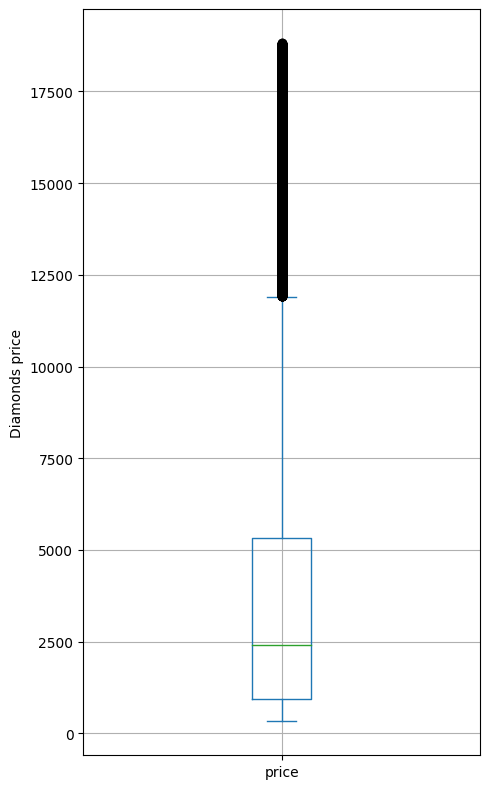

In [25]:
#Some visualizations to understand de dataset
data = diamonds_train_sorted['price']
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('Diamonds price')
plt.tight_layout()
plt.grid()
plt.show()

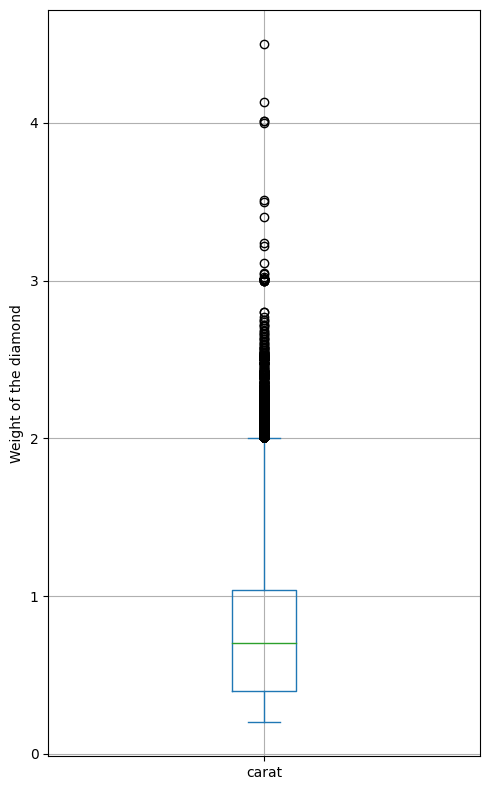

In [26]:
data = diamonds_train_sorted['carat']
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('Weight of the diamond')
plt.tight_layout()
plt.grid()
plt.show()

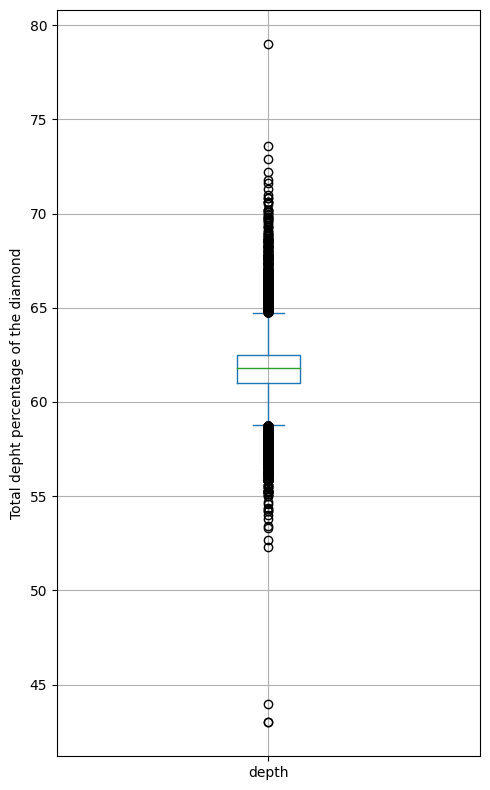

In [27]:
data = diamonds_train_sorted['depth']
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('Total depht percentage of the diamond')
plt.tight_layout()
plt.grid()
plt.show()

In [28]:
cut_price = diamonds_train_sorted[['price', 'cut']].groupby(['cut'], 
                    as_index=False).mean().sort_values(by = 'price', ascending= True).reset_index(drop = True)
cut_price

,cut,price
0,Ideal,3436.112577
1,Good,3880.611794
2,Very Good,3994.444420
3,Fair,4333.271980
4,Premium,4617.322612


In [29]:
cut_price.iplot(kind='bar',
                  x='cut',
                y='price',
                  xTitle='Cut',
                  yTitle='Price',
                  title='RELACIÓN PRECIO-CUT DE LOS DIAMANTES')

In [30]:
color_price = diamonds_train_sorted[['price', 'color']].groupby(['color'], 
                    as_index=False).mean().sort_values(by = 'price', ascending= True).reset_index(drop = True)
color_price

,color,price
0,E,3088.342526
1,D,3134.943157
2,F,3677.355720
3,G,4023.214902
4,H,4476.469014
5,I,5090.868800
6,J,5346.234112


In [31]:
color_price.iplot(kind='bar',
                  x='color',
                y='price',
                  xTitle='Color',
                  yTitle='Price',
                  title='RELACIÓN PRECIO-COLOR DEL DIAMANTE')

In [32]:
clarity_price = diamonds_train_sorted[['price', 'clarity']].groupby(['clarity'], 
                    as_index=False).mean().sort_values(by = 'price', ascending= True).reset_index(drop = True)
clarity_price

,clarity,price
0,VVS1,2559.498558
1,IF,2797.897513
2,VVS2,3240.978942
3,VS1,3796.813551
4,VS2,3913.590182
5,I1,3971.206039
6,SI1,3999.856908
7,SI2,5101.044307


In [33]:
clarity_price.iplot(kind='bar',
                  x='clarity',
                y='price',
                  xTitle='Clarity',
                  yTitle='Price',
                  title='RELACIÓN PRECIO-CLARIDAD DEL DIAMANTE')

In [34]:
city_price = diamonds_train_sorted[['price', 'city']].groupby(['city'], 
                    as_index=False).mean().sort_values(by = 'price', ascending= True).reset_index(drop = True)
city_price

,city,price
0,Tel Aviv,3753.746507
1,Antwerp,3842.225679
2,Luxembourg,3853.282809
3,Paris,3906.252569
4,Las Vegas,3919.199536
5,New York City,3927.937355
6,London,3952.769387
7,Surat,3966.823379
8,Madrid,3977.653937
9,Kimberly,3980.353095


In [35]:
city_price.iplot(kind='bar',
                  x='city',
                y='price',
                  xTitle='City',
                  yTitle='Price',
                  title='RELACIÓN PRECIO-CIUDAD DEL DIAMANTE')

Text(0.5, 1.0, 'Z VS PRICE')

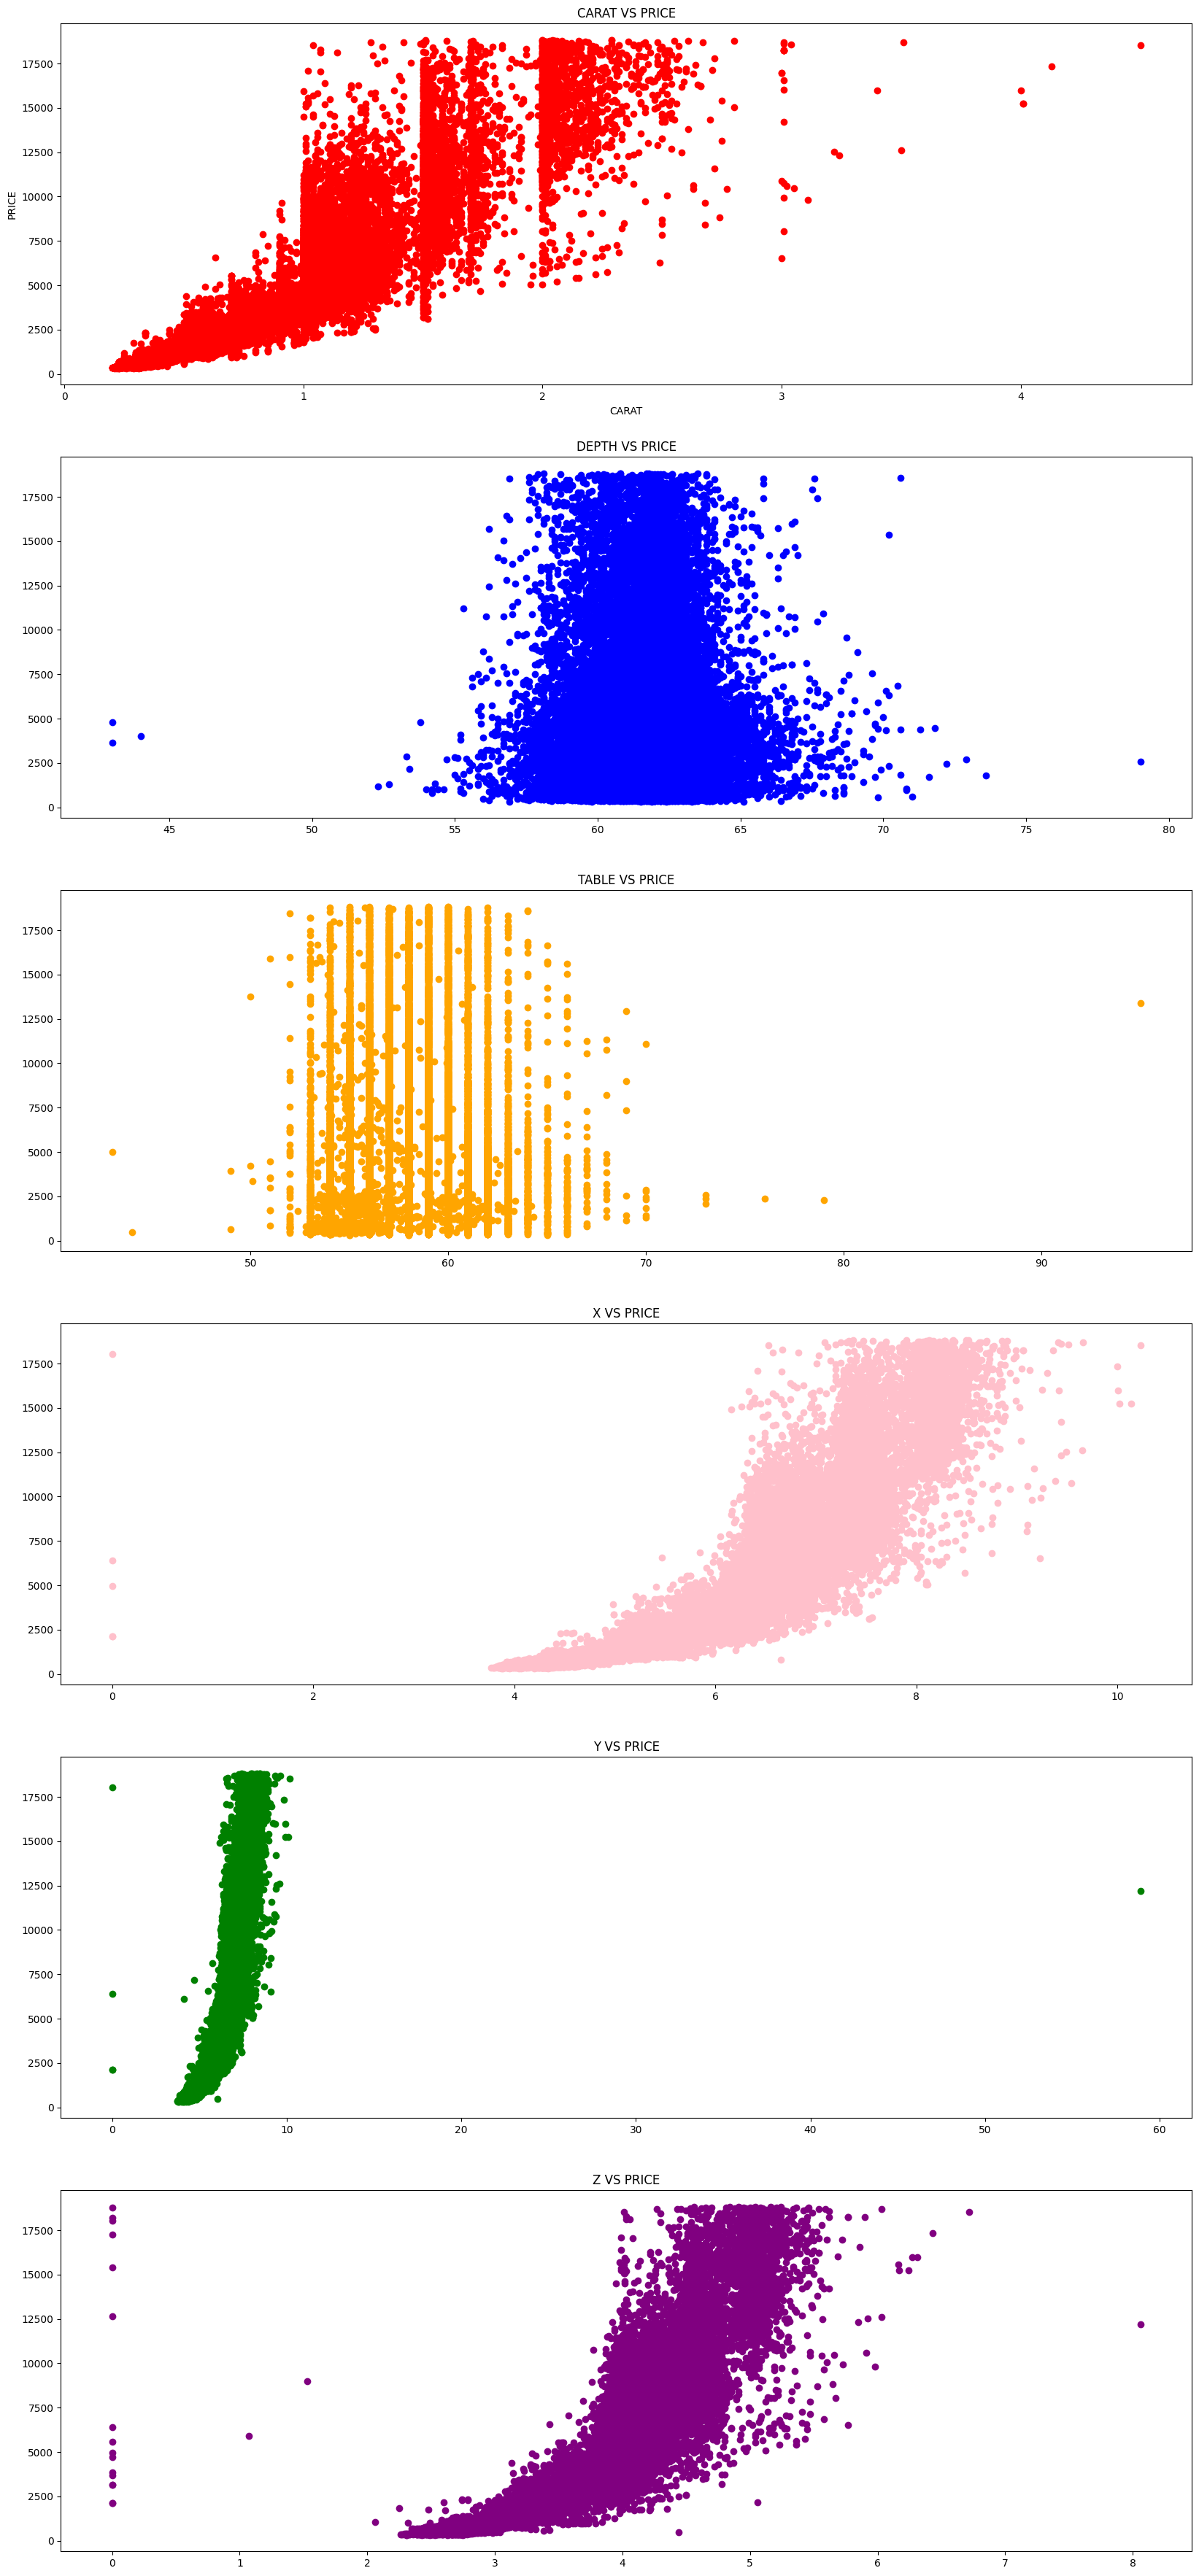

In [36]:
fig, axes = plt.subplots(nrows = 6, ncols =1, figsize=(20,45))
axes[0].scatter(diamonds_train_sorted['carat'], diamonds_train_sorted['price'] , color='red')
axes[0].set_xlabel('CARAT')
axes[0].set_ylabel('PRICE')
axes[0].set_title('CARAT VS PRICE')
axes[1].scatter(diamonds_train_sorted['depth'], diamonds_train_sorted['price'], color='blue')
axes[1].set_title('DEPTH VS PRICE')
axes[2].scatter(diamonds_train_sorted['table'], diamonds_train_sorted['price'] , color='orange')
axes[2].set_title('TABLE VS PRICE')
axes[3].scatter(diamonds_train_sorted['x'], diamonds_train_sorted['price'], color='pink')
axes[3].set_title('X VS PRICE')
axes[4].scatter(diamonds_train_sorted['y'], diamonds_train_sorted['price'], color='green')
axes[4].set_title('Y VS PRICE')
axes[5].scatter(diamonds_train_sorted['z'], diamonds_train_sorted['price'], color='purple')
axes[5].set_title('Z VS PRICE')